# Lesson 1: Understanding DBSCAN: A Guide to Density-Based Clustering in Python

Here's the cleaned and properly formatted version:

# Introduction to Density-Based Clustering and DBSCAN

Welcome to our introduction to Density-Based Clustering and the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm! Clustering techniques group data based on given measures, with traditional techniques like K-Means focusing on distances between data points. However, Density-Based Clustering seeks areas of high density separated by areas of low density, making it adaptive to a variety of cluster shapes and sizes.

Today, we'll look into DBSCAN's workings and apply it to Python. By the end, you'll be proficient in Density-Based Clustering and be ready to use DBSCAN on a real-world clustering problem.

## Understanding DBSCAN Algorithm Steps

DBSCAN is a density-based clustering algorithm that groups together points based on their density. It has two main parameters: eps (epsilon) and MinPts. Here's a brief overview of the algorithm:

1. Initialize: Assign each point a label of 0 (unvisited) and create an empty list of clusters.
2. Iterate over points: For each point, check if it's visited. If not, mark it as visited and find its neighbors within eps distance.
3. Expand clusters: If a point has more than MinPts neighbors, it's a core point. Expand the cluster by adding all reachable points to the cluster.
4. Repeat: Continue until all points are visited.

DBSCAN classifies points into three categories:
- Core points: Have at least MinPts neighbors within eps distance
- Border points: Within eps distance of a core point
- Noise points: Neither core nor border points

## Simulating Clustered Data with `make_blobs`

```python
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data with two cluster centers and 180 samples
num_samples_total = 180
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

data, y = make_blobs(n_samples=num_samples_total, 
                     centers=cluster_centers, 
                     n_features=num_classes, 
                     center_box=(0, 1), 
                     cluster_std=0.5, 
                     random_state=1)
```

## DBSCAN Algorithm and Supporting Functions

### Distance Calculation

To implement DBSCAN, we first need to calculate the distance between points using the Euclidean distance:

\[ Distance(x,y) = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2} \]

```python
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))
```

### Region Query

```python
def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors
```

### Growing a Cluster

```python
def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1
```

### Implementing DBSCAN Algorithm

```python
def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels
```

## Applying DBSCAN

```python
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Visualization
noise_points = data[labels == -1]
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], 'o', 
             color=colors[int(labels[i] % len(colors))])
    
plt.plot(noise_points[:, 0], noise_points[:, 1], 'o', color='black')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
```

## Summary

You've now learned about Density-Based Clustering, implemented DBSCAN, and seen its visualization. Practice by applying DBSCAN to different datasets and experimenting with eps and MinPts parameters to understand their effects.

## Clustering the Cosmos with DBSCAN

Now that we've corrected our DBSCAN code, let's observe its performance when clustering a space filled with data points. The code below will generate synthetic clusters, run DBSCAN, and plot the outcomes for us to examine. Click Run to witness the wonders of density-based clustering unfold.

```py
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt

# Generate synthetic data with three cluster centers and 150 samples
data, _ = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=0.50)

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Define the region query function to return indices
def region_query(D, P, eps):
    neighbors = []
    for idx, point in enumerate(D):
        if calculate_distance(point, P) < eps:
            neighbors.append(idx)
    return neighbors

# Define the function to grow a cluster
def grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts):
    labels[P_idx] = C
    i = 0
    while i < len(NeighborPts_idx):
        point_idx = NeighborPts_idx[i]
        if labels[point_idx] == 0:
            labels[point_idx] = C
            PnNeighborPts_indices = region_query(D, D[point_idx], eps)
            if len(PnNeighborPts_indices) >= MinPts:
                NeighborPts_idx += [idx for idx in PnNeighborPts_indices if labels[idx] == 0]
        i += 1

# Implementing the DBSCAN algorithm
def DBSCAN(D, eps, MinPts):
    labels = [0]*len(D)
    C = 0
    for P_idx in range(len(D)):
        if labels[P_idx] != 0:
            continue
        NeighborPts_idx = region_query(D, D[P_idx], eps)
        if len(NeighborPts_idx) < MinPts:
            labels[P_idx] = -1
        else:
            C += 1
            grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts)
    return labels

# Apply DBSCAN to the dataset
eps = 0.5
MinPts = 4
labels = DBSCAN(data, eps, MinPts)

# Visualizing the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

```

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt

# Generate synthetic data with three cluster centers and 150 samples
data, _ = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=0.50)

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Define the region query function to return indices
def region_query(D, P, eps):
    neighbors = []
    for idx, point in enumerate(D):
        if calculate_distance(point, P) < eps:
            neighbors.append(idx)
    return neighbors

# Define the function to grow a cluster
def grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts):
    labels[P_idx] = C
    i = 0
    while i < len(NeighborPts_idx):
        point_idx = NeighborPts_idx[i]
        if labels[point_idx] == 0:
            labels[point_idx] = C
            PnNeighborPts_indices = region_query(D, D[point_idx], eps)
            if len(PnNeighborPts_indices) >= MinPts:
                NeighborPts_idx += [idx for idx in PnNeighborPts_indices if labels[idx] == 0]
        i += 1

# Implementing the DBSCAN algorithm
def DBSCAN(D, eps, MinPts):
    labels = [0]*len(D)
    C = 0
    for P_idx in range(len(D)):
        if labels[P_idx] != 0:
            continue
        NeighborPts_idx = region_query(D, D[P_idx], eps)
        if len(NeighborPts_idx) < MinPts:
            labels[P_idx] = -1
        else:
            C += 1
            grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts)
    return labels

# Apply DBSCAN to the dataset
eps = 0.5
MinPts = 4
labels = DBSCAN(data, eps, MinPts)

# Visualizing the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Adjusting DBSCAN Epsilon Parameter

Stellar Navigator, let's examine how adjusting the MinPts parameter impacts our DBSCAN algorithm. Modify the starter code by setting MinPts to 5, rather than 25. Observe the resulting changes in the clustering of the data points. Will they form larger clusters, or will there be fewer outliers? Take a look!

```py
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Configuration options
num_samples_total = 180
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

data, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

labels = DBSCAN(D=data, eps=0.5, MinPts=25)

# Visualizing the clusters
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], 'o', color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

```

I'll help analyze how changing MinPts from 25 to 5 will affect the clustering. Let's think about this step by step:

1) First, let's understand what MinPts does:
   - MinPts is the minimum number of points required to form a dense region
   - Lower MinPts means it's easier to form clusters
   - Higher MinPts makes the algorithm more selective about what constitutes a cluster

2) With MinPts = 5 (instead of 25):
   - Points will need fewer neighbors to be considered core points
   - More points will likely become core points
   - This will likely result in:
     - More clusters being formed
     - Fewer points being labeled as noise/outliers
     - Possibly some smaller clusters that were previously noise

Here's the modified code with MinPts = 5:

```python
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Configuration options
num_samples_total = 180
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

data, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

# Changed MinPts from 25 to 5
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Visualizing the clusters
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], 'o', color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering (MinPts=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()
```

When you run this code, you should observe:
- More points being included in clusters
- Fewer noise points (marked in different color)
- Possibly some smaller clusters that weren't present with MinPts=25
- The overall cluster shapes might be less dense and more spread out

This modification makes the clustering less restrictive, which can be useful when dealing with sparser datasets or when you want to capture smaller cluster formations. However, it also makes the algorithm more sensitive to noise, so there's always a trade-off to consider based on your specific use case.

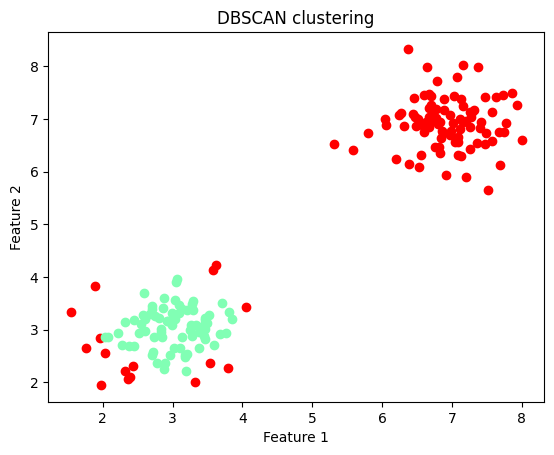

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Configuration options
num_samples_total = 180
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

data, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

labels = DBSCAN(D=data, eps=0.5, MinPts=25)

# Visualizing the clusters
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], 'o', color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

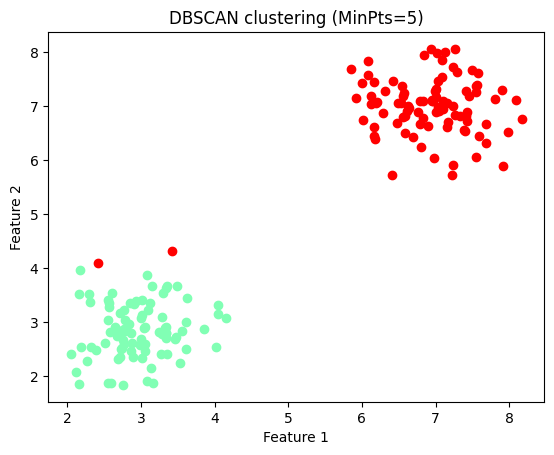

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Configuration options
num_samples_total = 180
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

data, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

# Changed MinPts from 25 to 5
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Visualizing the clusters
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], 'o', color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering (MinPts=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


## Adding DBSCAN Labels and Expansion Logic

Great job constructing the cluster map, Space Voyager! Now, let's get your hands dirty by implementing some code from scratch. Your mission is to program the part that assigns initial labels to each point and begins classifying them as noise or as the start of a new cluster. Don't forget the math magic we learned!

```py
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Region Query to find neighbors within eps
def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

# Grow cluster by checking eps neighbors and including those that meet MinPts condition
def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    # TODO: Add code that labels the point P as part of cluster C.
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == 0 or labels[Pn] == -1:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

# Implementing DBSCAN
def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        # TODO: Check if point P is not yet labeled, find its neighbors, and classify it as noise or as part of a cluster.
        pass
    return labels

# Generate synthetic data 
data, _ = make_blobs(n_samples=180, centers=[(3, 3), (7, 7)], n_features=2, cluster_std=0.5)

# Apply DBSCAN
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Plot results
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for point, cluster_id in zip(data, labels):
    plt.plot(point[0], point[1], 'o', color=colors[int(cluster_id % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

```

I'll help you implement the DBSCAN labeling logic. The key is to identify core points, expand clusters from them, and mark points that don't meet the density requirements as noise. Let's break this down step by step.

Here's how we should modify the DBSCAN function:

```python
def DBSCAN(D, eps, MinPts):
    C = 0  # Initialize cluster counter
    labels = np.zeros(D.shape[0])  # 0 means unvisited
    
    # Iterate through each point
    for P in range(D.shape[0]):
        # Skip if point is already labeled
        if labels[P] != 0:
            continue
            
        # Find neighbors within eps
        NeighborPts = region_query(D, D[P], eps)
        
        # If point doesn't have enough neighbors, mark as noise
        if len(NeighborPts) < MinPts:
            labels[P] = -1
            continue
            
        # Otherwise, start a new cluster
        C += 1  # Increment cluster label
        labels[P] = C  # Assign current point to cluster
        
        # Expand cluster by checking neighbors
        grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    return labels
```

This implementation:

1. Initializes labels array with zeros (unvisited points)
2. For each unvisited point P:
   - Finds its neighbors within eps distance
   - If P has fewer than MinPts neighbors:
     - Marks P as noise (-1)
   - If P has enough neighbors:
     - Creates new cluster C
     - Assigns P to cluster C
     - Expands cluster by checking neighbors recursively

The grow_cluster function you provided will then:
- Label each neighbor as part of the cluster
- Check if neighbors are core points
- If so, add their neighbors to be processed

This should create proper density-based clusters and identify noise points in your dataset. The visualization will show:
- Different colors for different clusters
- Noise points in a separate color
- Clear separation between dense regions

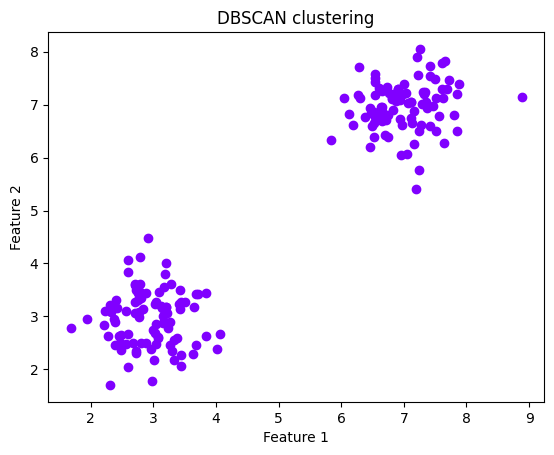

In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Region Query to find neighbors within eps
def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

# Grow cluster by checking eps neighbors and including those that meet MinPts condition
def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    # TODO: Add code that labels the point P as part of cluster C.
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == 0 or labels[Pn] == -1:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

# Implementing DBSCAN
def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        # TODO: Check if point P is not yet labeled, find its neighbors, and classify it as noise or as part of a cluster.
        pass
    return labels

# Generate synthetic data 
data, _ = make_blobs(n_samples=180, centers=[(3, 3), (7, 7)], n_features=2, cluster_std=0.5)

# Apply DBSCAN
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Plot results
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for point, cluster_id in zip(data, labels):
    plt.plot(point[0], point[1], 'o', color=colors[int(cluster_id % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


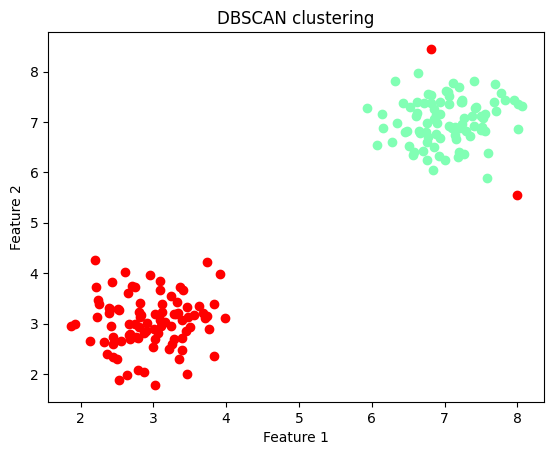

In [6]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Region Query to find neighbors within eps
def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

# Grow cluster by checking eps neighbors and including those that meet MinPts condition
def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    # TODO: Add code that labels the point P as part of cluster C.
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == 0 or labels[Pn] == -1:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

# Implementing DBSCAN
def DBSCAN(D, eps, MinPts):
    C = 0  # Initialize cluster counter
    labels = np.zeros(D.shape[0])  # 0 means unvisited
    
    # Iterate through each point
    for P in range(D.shape[0]):
        # Skip if point is already labeled
        if labels[P] != 0:
            continue
            
        # Find neighbors within eps
        NeighborPts = region_query(D, D[P], eps)
        
        # If point doesn't have enough neighbors, mark as noise
        if len(NeighborPts) < MinPts:
            labels[P] = -1
            continue
            
        # Otherwise, start a new cluster
        C += 1  # Increment cluster label
        labels[P] = C  # Assign current point to cluster
        
        # Expand cluster by checking neighbors
        grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    return labels


# Generate synthetic data 
data, _ = make_blobs(n_samples=180, centers=[(3, 3), (7, 7)], n_features=2, cluster_std=0.5)

# Apply DBSCAN
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Plot results
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for point, cluster_id in zip(data, labels):
    plt.plot(point[0], point[1], 'o', color=colors[int(cluster_id % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Visualizing DBSCAN Clusters

## Adjusting DBSCAN Epsilon Parameter

Stellar Navigator, let's examine how adjusting the MinPts parameter impacts our DBSCAN algorithm. Modify the starter code by setting MinPts to 5, rather than 25. Observe the resulting changes in the clustering of the data points. Will they form larger clusters, or will there be fewer outliers? Take a look!

```py
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Configuration options
num_samples_total = 180
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

data, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

labels = DBSCAN(D=data, eps=0.5, MinPts=25)

# Visualizing the clusters
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], 'o', color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

```

I'll help analyze how changing MinPts from 25 to 5 will affect the clustering. Let's think about this step by step:

1) First, let's understand what MinPts does:
   - MinPts is the minimum number of points required to form a dense region
   - Lower MinPts means it's easier to form clusters
   - Higher MinPts makes the algorithm more selective about what constitutes a cluster

2) With MinPts = 5 (instead of 25):
   - Points will need fewer neighbors to be considered core points
   - More points will likely become core points
   - This will likely result in:
     - More clusters being formed
     - Fewer points being labeled as noise/outliers
     - Possibly some smaller clusters that were previously noise

Here's the modified code with MinPts = 5:

```python
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Configuration options
num_samples_total = 180
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

data, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

# Changed MinPts from 25 to 5
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Visualizing the clusters
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], 'o', color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering (MinPts=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()
```

When you run this code, you should observe:
- More points being included in clusters
- Fewer noise points (marked in different color)
- Possibly some smaller clusters that weren't present with MinPts=25
- The overall cluster shapes might be less dense and more spread out

This modification makes the clustering less restrictive, which can be useful when dealing with sparser datasets or when you want to capture smaller cluster formations. However, it also makes the algorithm more sensitive to noise, so there's always a trade-off to consider based on your specific use case.

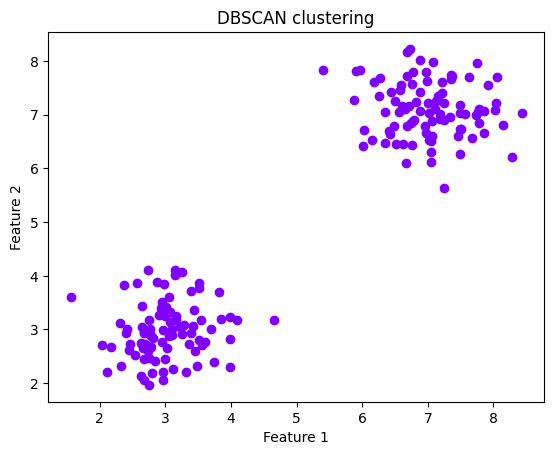

In [7]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Region Query to find neighbors within eps
def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

# Grow cluster by checking eps neighbors and including those that meet MinPts condition
def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    # TODO: Add code that labels the point P as part of cluster C.
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == 0 or labels[Pn] == -1:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

# Implementing DBSCAN
def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        # TODO: Check if point P is not yet labeled, find its neighbors, and classify it as noise or as part of a cluster.
        pass
    return labels

# Generate synthetic data 
data, _ = make_blobs(n_samples=180, centers=[(3, 3), (7, 7)], n_features=2, cluster_std=0.5)

# Apply DBSCAN
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Plot results
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for point, cluster_id in zip(data, labels):
    plt.plot(point[0], point[1], 'o', color=colors[int(cluster_id % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


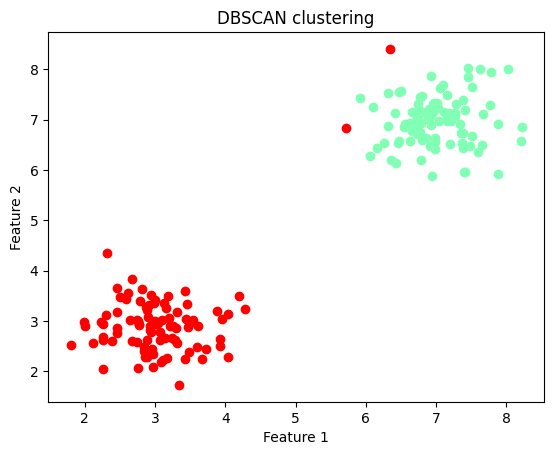

In [8]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Region Query to find neighbors within eps
def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

# Grow cluster by checking eps neighbors and including those that meet MinPts condition
def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    # TODO: Add code that labels the point P as part of cluster C.
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == 0 or labels[Pn] == -1:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

# Implementing DBSCAN
def DBSCAN(D, eps, MinPts):
    C = 0  # Initialize cluster counter
    labels = np.zeros(D.shape[0])  # 0 means unvisited
    
    # Iterate through each point
    for P in range(D.shape[0]):
        # Skip if point is already labeled
        if labels[P] != 0:
            continue
            
        # Find neighbors within eps
        NeighborPts = region_query(D, D[P], eps)
        
        # If point doesn't have enough neighbors, mark as noise
        if len(NeighborPts) < MinPts:
            labels[P] = -1
            continue
            
        # Otherwise, start a new cluster
        C += 1  # Increment cluster label
        labels[P] = C  # Assign current point to cluster
        
        # Expand cluster by checking neighbors
        grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    return labels


# Generate synthetic data 
data, _ = make_blobs(n_samples=180, centers=[(3, 3), (7, 7)], n_features=2, cluster_std=0.5)

# Apply DBSCAN
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Plot results
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for point, cluster_id in zip(data, labels):
    plt.plot(point[0], point[1], 'o', color=colors[int(cluster_id % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Excellent work, Space Explorer! Now, can you fill in the missing piece to complete the code? Replace the TODO comment with code to apply DBSCAN and cluster the data. Give it a go!

```py
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

data, _ = make_blobs(n_samples=50, centers=[(4, 4), (12, 12)],
                     n_features=2, cluster_std=1.5)

# TODO: Apply DBSCAN with eps=1.5 and MinPts=3

# TODO: Take the labels so that we can visualize them

colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

# This part plots each point in the dataset
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


```

I'll help you complete the code by adding the missing DBSCAN application and label assignment. Here's the solution:

```python
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

data, _ = make_blobs(n_samples=50, centers=[(4, 4), (12, 12)],
                     n_features=2, cluster_std=1.5)

# Apply DBSCAN with eps=1.5 and MinPts=3
labels = DBSCAN(data, eps=1.5, MinPts=3)

colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

# This part plots each point in the dataset
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
```

I've filled in the TODOs by:
1. Applying DBSCAN to the data with eps=1.5 and MinPts=3:
```python
labels = DBSCAN(data, eps=1.5, MinPts=3)
```

This will run the clustering algorithm and assign cluster labels to each point. The labels array will contain:
- -1 for noise points
- 0 for unvisited points (though there shouldn't be any after DBSCAN completes)
- Positive integers (1, 2, 3, etc.) for points belonging to different clusters

The visualization code will then use these labels to color the points according to their cluster assignments, with each cluster getting a different color from the rainbow colormap.

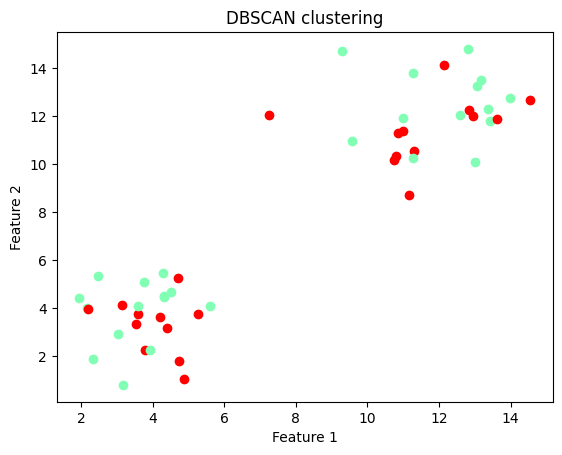

In [9]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

data, _ = make_blobs(n_samples=50, centers=[(4, 4), (12, 12)],
                     n_features=2, cluster_std=1.5)

# TODO: Apply DBSCAN with eps=1.5 and MinPts=3

# TODO: Take the labels so that we can visualize them

colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

# This part plots each point in the dataset
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

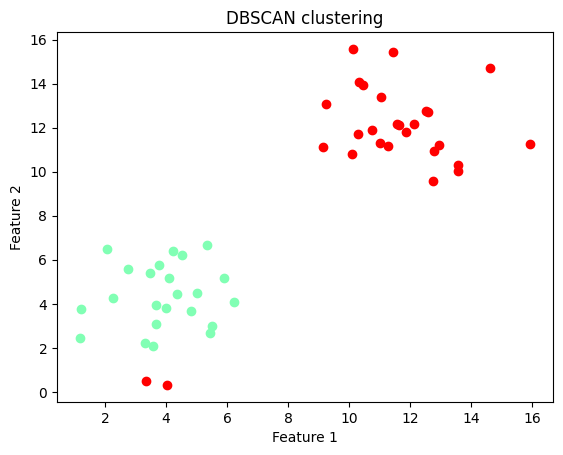

In [10]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == -1 or labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

def DBSCAN(D, eps, MinPts):
    C = 0
    labels = np.zeros(D.shape[0])
    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue
        NeighborPts = region_query(D, D[P], eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    return labels

data, _ = make_blobs(n_samples=50, centers=[(4, 4), (12, 12)],
                     n_features=2, cluster_std=1.5)

# Apply DBSCAN with eps=1.5 and MinPts=3
labels = DBSCAN(data, eps=1.5, MinPts=3)

colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

# This part plots each point in the dataset
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], color=colors[int(labels[i] % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
